# Ejercicio 18:
1- Lograr la secuencia extendida

2- Realizar el diagrama ojo para PAM4

3- Ampliar la gráfica del diagrama ojo para visualizarla más cercana a la siguiente imagen:



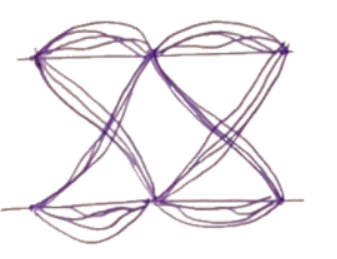

# Filtro transmisor

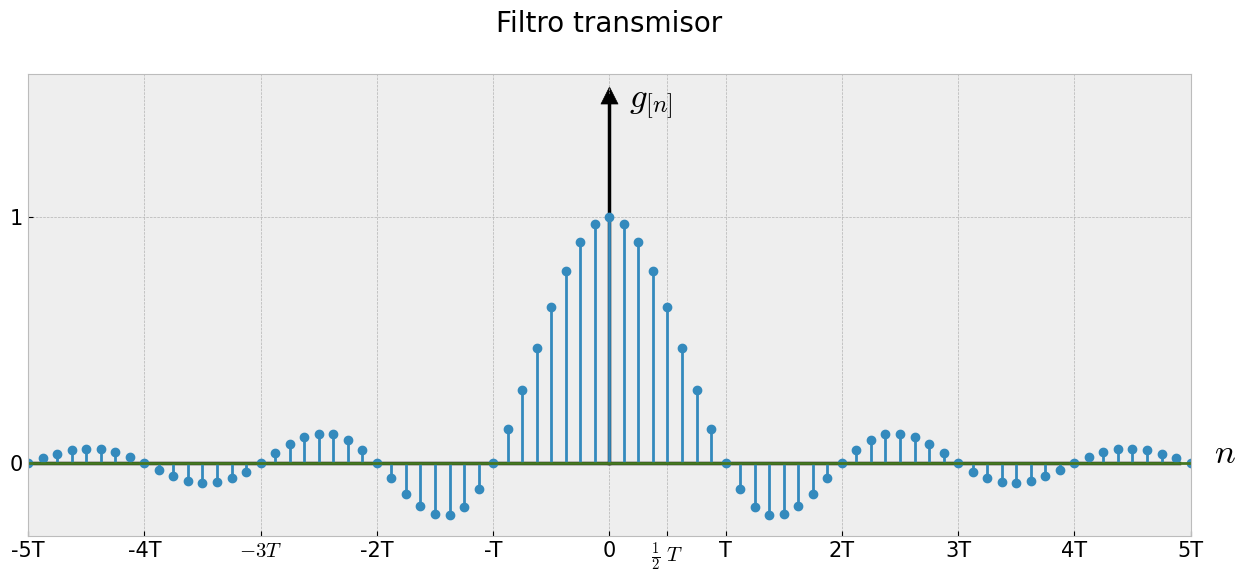

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use( 'bmh' )

# ====================
#  Generación de g[n]
# ====================

fB = 32e9    # Velocidad de simbolos (baud rate)
# Es la frecuencia de los simbolos, 32 GBaudios

T = 1 / fB   # Tiempo entre símbolos
M = 8        # Factor de sobremuestreo
fs = fB * M  # Sample rate

alpha = 0.1  # Factor de roll-off
L = 20       # ( 2 * L * M + 1 ) es el largo del filtro sobremuestreado

t = np.arange( -L, L, 1 / M ) * T

gn = np.sinc( t / T ) * np.cos( np.pi * alpha * t / T ) / ( 1 - 4 * alpha**2 * t**2 / T**2 )

params = { 'legend.fontsize': 'large',
           'figure.figsize': ( 15, 6 ),
           'axes.labelsize': 20,
           'axes.titlesize': 20,
           'xtick.labelsize': 15,
           'ytick.labelsize': 15,
           'axes.titlepad': 30 }
plt.rcParams.update( params )

fig, ax = plt.subplots()

x1_ejeVertical, y1_ejeVertical = [ 0, 0 ], [ 0, 1.5 ]
ax.plot( x1_ejeVertical, y1_ejeVertical, linewidth = 2.5, color = 'black' )
ax.scatter( x1_ejeVertical[ 1 ], y1_ejeVertical[ 1 ], marker = "^", color = 'black', s = 150 )

x1_ejeHorizontal, y1_ejeHorizontal = [ -5*T, 4.9*T ], [ 0, 0 ]
ax.plot( x1_ejeHorizontal, y1_ejeHorizontal, linewidth = 2.5, color = 'black' )

ax.stem( t, gn )
ax.set_title( 'Filtro transmisor' )

plt.text( T/6, 1.45, r'$g_{[n]}$', fontsize = 25, color = 'black' )
# plt.text( T/6, 1.45, r'$\int_{a}^{b} f(x)dx = F(b) - F(a)$', fontsize = 25, color = 'black' )

plt.text( 5.2*T, 0, r'$n$', fontsize = 25, color = 'black' )

abcisas = [ -5*T, -4*T, -3*T, -2*T, -T, 0, T/2, T, 2*T, 3*T, 4*T, 5*T ]
textos_abcisa = [ '-5T', '-4T', r'$-3T$', '-2T', '-T', '0', r'$\frac{1}{2} \ T$', 'T', '2T', '3T', '4T', '5T' ]
plt.xticks( abcisas, textos_abcisa )
ordenadas = [ 0, 1 ]
textos_ordenada = [ '0', '1' ]
plt.yticks( ordenadas, textos_ordenada )

plt.xlim( [ -5*T, 5*T ] )

plt.show()

# Generación de símbolos

In [4]:
import numpy as np
from random import randrange, seed
import datetime

segundos_desde_1970 = int( datetime.datetime.now().timestamp() )

print( 'Pasaron', segundos_desde_1970, 'segundos desde el 1ero de enero de 1970' )
seed( segundos_desde_1970 )

cantidad_simbolos = 1000
simbolos_PAM4 = np.empty( cantidad_simbolos )

for i in range( cantidad_simbolos ) :
    simbolos_PAM4[ i ] = randrange( -3, 4, 2 )

print( '\nUna muestra de los símbolos generados:\n', simbolos_PAM4[ 0 : 50 ] )

Pasaron 1757032132 segundos desde el 1ero de enero de 1970

Una muestra de los símbolos generados:
 [ 3.  3.  3. -3.  1.  1.  1. -3. -1. -1.  3.  3.  1.  3. -1.  3.  3. -3.
  1. -3.  3. -3. -3.  3.  1. -1. -3. -3.  1.  1. -1. -3. -3.  1.  1.  3.
  1. -3. -3.  3. -1.  1.  3. -3.  3.  1.  3.  1.  1. -1.]


# Secuencia extendida

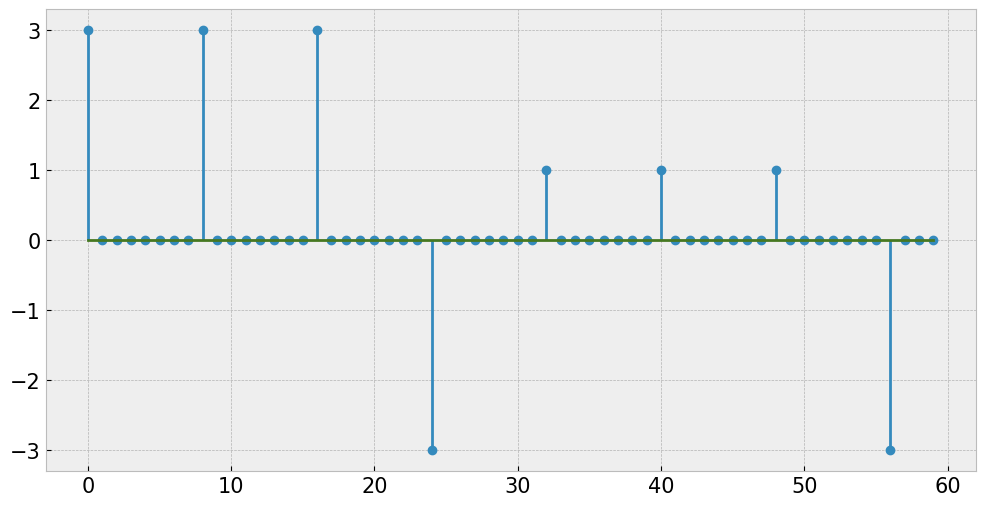

In [5]:
xn = np.zeros( cantidad_simbolos * M )

for i in range( cantidad_simbolos ) :
    xn[ i * M ] = simbolos_PAM4[ i ]

params = { 'legend.fontsize': 'large',
           'figure.figsize': ( 12, 6 ),
           'axes.labelsize': 20,
           'axes.titlesize': 20,
           'xtick.labelsize': 15,
           'ytick.labelsize': 15,
           'axes.titlepad': 30 }
plt.rcParams.update( params )

fig, ax = plt.subplots()

cuantos_chupetines = 60
ax.stem( np.arange( 0, cuantos_chupetines ), xn[ 0 : cuantos_chupetines ] )

plt.show()

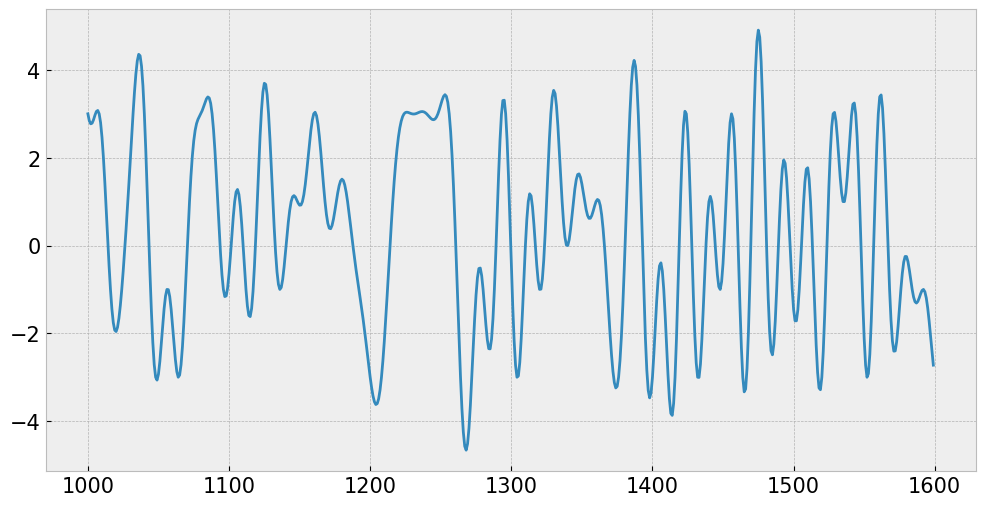

In [6]:
from scipy.signal import convolve

sn = convolve( xn, gn )

fig, ax = plt.subplots()

cuantos_chupetines = 1600
ax.plot( np.arange( 1000, cuantos_chupetines ), sn[ 1000 : cuantos_chupetines ] )
# ax.stem( np.arange( 1000, cuantos_chupetines ), sn[ 1000 : cuantos_chupetines ] )

plt.show()


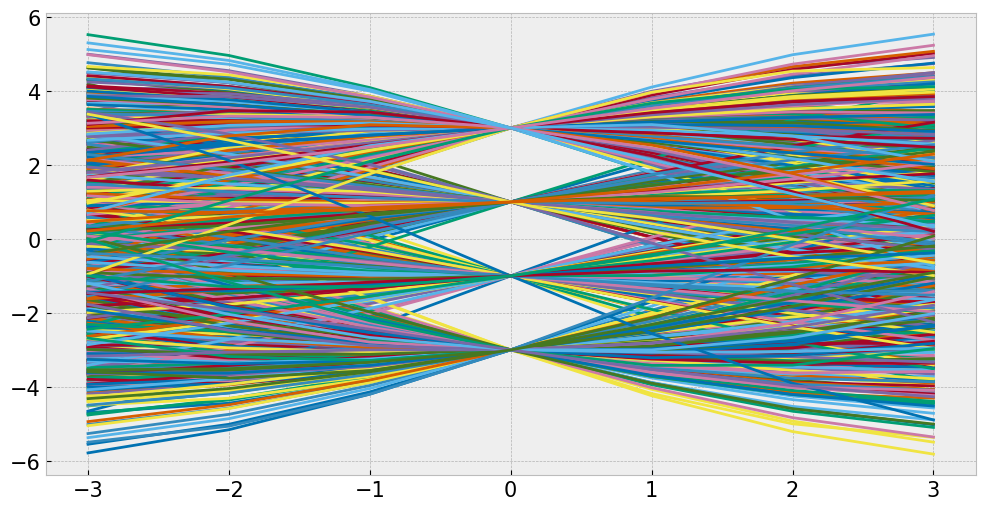

In [7]:

d = 4;  # Delay para centrar el ojo

for i in range( 2 * L + 1, cantidad_simbolos - ( 2 * L + 1 ) ) :
    sn_p = sn[ i * M + d : i * M + d + M ]
    plt.plot( np.arange( -3, 4 ), sn_p[ 1 : 8 ] )

plt.show()


In [8]:
%whos

Variable              Type        Data/Info
-------------------------------------------
L                     int         20
M                     int         8
T                     float       3.125e-11
abcisas               list        n=12
alpha                 float       0.1
ax                    Axes        Axes(0.125,0.11;0.775x0.77)
cantidad_simbolos     int         1000
convolve              function    <function convolve at 0x7c59812fc0e0>
cuantos_chupetines    int         1600
d                     int         4
datetime              module      <module 'datetime' from '<...>/python3.12/datetime.py'>
fB                    float       32000000000.0
fig                   Figure      Figure(1200x600)
fs                    float       256000000000.0
gn                    ndarray     320: 320 elems, type `float64`, 2560 bytes
i                     int         958
np                    module      <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
ordenadas             list 

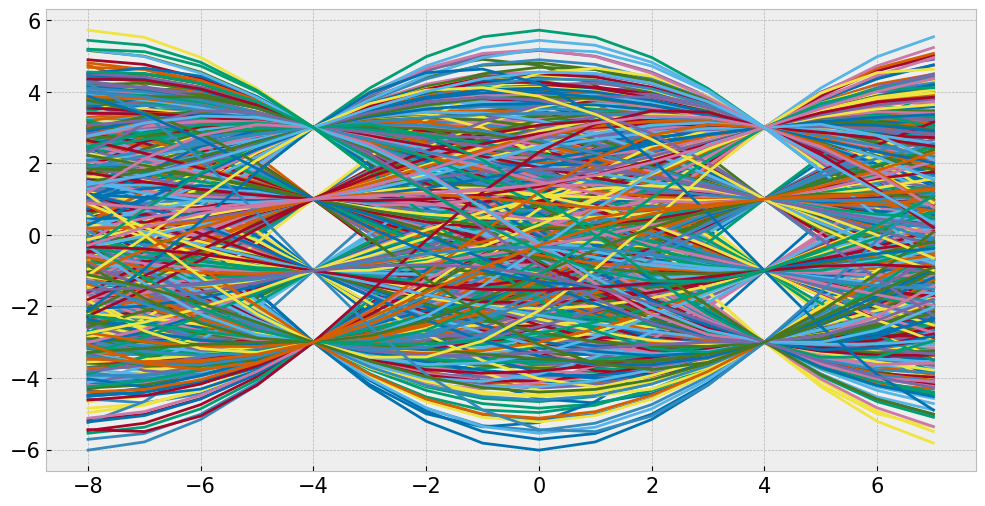

In [17]:
params = { 'legend.fontsize': 'large',
           'figure.figsize': ( 12, 6 ),
           'axes.labelsize': 20,
           'axes.titlesize': 20,
           'xtick.labelsize': 15,
           'ytick.labelsize': 15,
           'axes.titlepad': 30 }
plt.rcParams.update( params )

fig, ax = plt.subplots()

d = 4;  # Delay para centrar el ojo
samples_to_plot = 2 * M # Plot two symbol periods

for i in range( 2 * L + 1, cantidad_simbolos - ( 2 * L + 1 ) ) :
    # Ensure the slice does not go out of bounds
    start_index = i * M + d - samples_to_plot // 2
    end_index = start_index + samples_to_plot

    if start_index >= 0 and end_index <= len(sn):
        sn_p = sn[ start_index : end_index ]
        plt.plot( np.arange( -samples_to_plot // 2, samples_to_plot // 2 ), sn_p )


plt.show()